In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

1. Load the houseprices data from Thinkful's database.
2. Split your data into train and test sets.
3. Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
4. Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
5. Is the performance of your model satisfactory? Why?
6. Try to improve your model in terms of predictive performance by adding or removing some variables.

In [2]:
# import dataset
df = pd.read_csv(r'C:\Users\AP\Downloads\house prices.csv')

# columns to lower case
df.columns = map(str.lower, df.columns)

# list/number of numerical columns
num_col = df.select_dtypes(['int64', 'float64']).columns

# list/number of alpha columns
alpha_col = df.select_dtypes(['object']).columns

# convert alpha features to binary
df['mszoning'] = pd.get_dummies(df.mszoning, drop_first=True)
df['neighborhood'] = pd.get_dummies(df.neighborhood, drop_first=True)
df['exterior1st'] = pd.get_dummies(df.exterior1st, drop_first=True)

In [14]:
# Y is the target variable
Y = df.saleprice
# X is the feature set
X = df[['overallqual', 'grlivarea', 'garagecars', 'mszoning', 'neighborhood', 'exterior1st']]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: in

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     678.8
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:04:06   Log-Likelihood:                -14015.
No. Observations:                1168   AIC:                         2.804e+04
Df Residuals:                    1162   BIC:                         2.807e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.593e+04   5350.109    -17.931      0.000   -1.06e+05   -8.54e+04
overallqual   2.656e+04   1208.317     21.982      0.000    2.42e+04    2.89e+04
grlivarea       48.5367      2.762     17.573      0.000      43.118      53.956
garagecars    2.304e+04   1986.624     11.595      0.000    1.91e+04    2.69e+04
mszoning     -5850.6054   5482.603     -1.067      0.286   -1.66e+04    4906.304
neighborhood -3.959e+04   2.79e+04     -1.418      0.156   -9.44e+04    1.52e+04
exterior1st           0          0        nan        nan           0           0
==============================================================================
Omnibus:                      276.815   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7734.780
Skew:                           0.427   Prob(JB):                         0.00
Kurtosis:                      15.578   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Adjusted R-squared is 0.74, which means 74% of the variance in the target variable can be explained by the model, and 26% is unexplained.

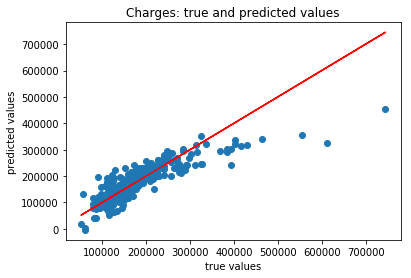

Mean absolute error of the prediction is: 30101.575874614624
Mean squared error of the prediction is: 2027396043.5017712
Root mean squared error of the prediction is: 45026.614835025866
Mean absolute percentage error of the prediction is: 17.816881016433225


In [15]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The prediction metrics are all relatively high. Lower numbers are better. This seems low. Let's try and improve this by adding two new features.

In [16]:
# create totalsf variable
df['totalsf'] = df['totalbsmtsf'] + df['1stflrsf'] + df['2ndflrsf']

# create interaction variable
df['int_over_sf'] = df['totalsf'] * df['overallqual']

# Y is the target variable
Y = df['saleprice']
# X is the feature set
X = df[['overallqual', 'grlivarea', 'garagecars', 'mszoning', 'neighborhood', 'exterior1st', 'totalsf', 'int_over_sf']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     616.6
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:04:14   Log-Likelihood:                -17462.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1451   BIC:                         3.499e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.126e+04   1.14e+04     -0.988      0.323   -3.36e+04    1.11e+04
overallqual   1.043e+04   1884.700      5.535      0.000    6735.233    1.41e+04
grlivarea       15.3773      3.920      3.923      0.000       7.687      23.067
garagecars    1.929e+04   1717.864     11.229      0.000    1.59e+04    2.27e+04
mszoning      2161.2806   4970.448      0.435      0.664   -7588.752    1.19e+04
neighborhood -2.592e+04   2.69e+04     -0.963      0.335   -7.87e+04    2.69e+04
exterior1st   -541.1402   3.82e+04     -0.014      0.989   -7.54e+04    7.43e+04
totalsf         -5.4571      5.314     -1.027      0.305     -15.880       4.966
int_over_sf      5.1846      0.618      8.391      0.000       3.972       6.397
==============================================================================
Omnibus:                     1115.763   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193269.829
Skew:                          -2.652   Prob(JB):                         0.00
Kurtosis:                      59.115   Cond. No.                     7.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adjusted R-squared increased a few percentage points to 0.77. After adding two new features, the model can now account for 77% of the variance in the target variable. 

In [18]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

ValueError: shapes (292,7) and (9,) not aligned: 7 (dim 1) != 9 (dim 0)